# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('05-x_train-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('05-x_test-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('05-y_train-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('05-y_test-RAVDESS-SINRUIDOSEXTREMOS-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [3]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [4]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [5]:
overs = RandomOverSampler()

In [6]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [7]:
y_t_overs

,Emociones
0,1
1,3
2,3
3,3
4,3
...,...
579,3
580,3
581,3
582,3


# **MODELO DE MARCHINE LEARNING**

In [10]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               11776     
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [11]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_t_overs)
#y_test = to_categorical(y_test)

clf.fit(x_t_overs, y_t_Categorical , epochs=1500)
y_predict = clf.predict(x_test)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#1500 65
#2500 57
#4000 60 

Epoch 1/1500
19/19 [==============================] - 1s 3ms/step - loss: 87.5910 - accuracy: 0.3065
Epoch 2/1500
19/19 [==============================] - 0s 3ms/step - loss: 22.8771 - accuracy: 0.3510
Epoch 3/1500
19/19 [==============================] - 0s 3ms/step - loss: 9.6725 - accuracy: 0.3596
Epoch 4/1500
19/19 [==============================] - 0s 3ms/step - loss: 7.7793 - accuracy: 0.3596
Epoch 5/1500
19/19 [==============================] - 0s 3ms/step - loss: 6.9051 - accuracy: 0.3836
Epoch 6/1500
19/19 [==============================] - 0s 4ms/step - loss: 6.8337 - accuracy: 0.3750
Epoch 7/1500
19/19 [==============================] - 0s 3ms/step - loss: 6.6325 - accuracy: 0.3476
Epoch 8/1500
19/19 [==============================] - 0s 3ms/step - loss: 7.5325 - accuracy: 0.3390
Epoch 9/1500
19/19 [==============================] - 0s 3ms/step - loss: 6.2588 - accuracy: 0.3870
Epoch 10/1500
19/19 [==============================] - 0s 3ms/step - loss: 6.4851 - accuracy: 0.39

array([3, 0, 1, 1, 2, 2, 1, 3, 2, 1, 1, 2, 1, 3, 1, 1, 2, 0, 0, 0, 2, 3,
       0, 3, 3, 1, 2, 3, 1, 1, 0, 0, 2, 0, 1, 1, 3, 3, 0, 2, 0, 1, 0, 0,
       0, 2, 2, 0, 2, 1, 1, 1, 0, 3, 3, 1, 3, 0, 1, 3, 1, 1, 1, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 0, 3, 0, 3, 0, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2,
       1, 0, 3, 3, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 3, 3, 3, 3, 3, 0, 2, 0,
       0, 0, 1, 3, 1, 1, 2, 0, 0, 1, 0, 3, 2])

# **EVALUACION**

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        39
           1       0.55      0.77      0.64        30
           2       0.26      0.55      0.35        11
           3       0.73      0.44      0.55        43

    accuracy                           0.61       123
   macro avg       0.60      0.61      0.58       123
weighted avg       0.68      0.61      0.62       123



In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        39
           1       0.55      0.77      0.64        30
           2       0.26      0.55      0.35        11
           3       0.73      0.44      0.55        43

    accuracy                           0.61       123
   macro avg       0.60      0.61      0.58       123
weighted avg       0.68      0.61      0.62       123

Matriz de confusión, sin normalización
[[27  9  2  1]
 [ 1 23  2  4]
 [ 1  2  6  2]
 [ 3  8 13 19]]


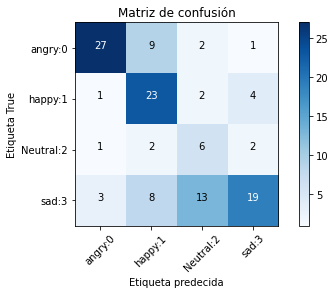

In [14]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')